The purpose of this notebook is to calm my curiosity (and an ongoing argument) about the popularity of songs performed on English among the long story of the Eurovision Song Contest.

The dataset used is [*Eurovision Song Lyrics*](https://www.kaggle.com/minitree/eurovision-song-lyrics) by Kaggle user minitree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#The dataset needs to be downloaded and the correct path indicated here for this notebook to work.
with open('/content/eurovision-lyrics.json') as json_file:
  jsonstring = json.load(json_file)
df = pd.DataFrame.from_dict(jsonstring,orient="index")
df.head(10)



,#,Country,#.1,Artist,Song,Language,Pl.,Sc.,Eurovision_Number,Year,Host_Country,Host_City,Lyrics,Lyrics translation
0,1,Netherlands,1,Jetty Paerl,De vogels van Holland,Dutch,-,-,1,1956,Switzerland,Lugano,De vogels van Holland zijn zo muzikaal\nZe ler...,The birds of Holland are so musical\nThey alre...
1,2,Switzerland,1,Lys Assia,Das alte Karussell,German,-,-,1,1956,Switzerland,Lugano,Das alte Karussell\nDas geht nicht mehr so sch...,The old carousel\nIt doesn't go as fast anymor...
2,3,Belgium,1,Fud Leclerc,Messieurs les noyés de la Seine,French,-,-,1,1956,Switzerland,Lugano,Messieurs les noyés de la Seine\nOuvrez-moi le...,Ye drowned men of the river Seine (1)\nOpen th...
3,4,Germany (West),1,Walter Andreas Schwarz,Im Wartesaal zum großen Glück,German,-,-,1,1956,Switzerland,Lugano,Es gibt einen Hafen\nDa fährt kaum ein Schiff\...,There is a harbour\nWhere hardly any ship leav...
4,5,France,1,Mathé Altéry,Le temps perdu,French,-,-,1,1956,Switzerland,Lugano,"Chante, carillon\nLe chant du temps perdu\nCha...","Sing, carillon\nThe song of lost time\nSing yo..."
5,6,Luxembourg,1,Michèle Arnaud,Ne crois pas,French,-,-,1,1956,Switzerland,Lugano,Si on te dit que t'a une belle gueule\nY a pas...,If they told you that you have a good look\nTh...
6,7,Italy,1,Franca Raimondi,Aprite le finestre,Italian,-,-,1,1956,Switzerland,Lugano,La prima rosa rossa è già sbocciata\nE nascon ...,The first red rose has already blossomed\nAnd ...
7,8,Netherlands,-,Corry Brokken,Voorgoed voorbij,Dutch,-,-,1,1956,Switzerland,Lugano,Voorgoed voorbij\nNu zijn we nooit meer samen\...,Over for good\nNow we'll never be together aga...
8,9,Switzerland,-,Lys Assia (2),Refrain,French,1,-,1,1956,Switzerland,Lugano,[Intro]\n(Refrain d'amour)\n\n[Couplet 1]\nRef...,"Chorus of love, or or or or\nChorus, color of ..."
9,10,Belgium,-,Mony Marc,Le plus beau jour de ma vie,French,-,-,1,1956,Switzerland,Lugano,Les cloches sonnent\nTout carillonne\nLe plus ...,The bells are ringing\nEverything is heralding...


In [3]:
#Keeping only the columns of interest. "Pl." indicates the final place on the contest.
df = df[['Song','Language','Year','Pl.']]
df.head(10)

,Song,Language,Year,Pl.
0,De vogels van Holland,Dutch,1956,-
1,Das alte Karussell,German,1956,-
2,Messieurs les noyés de la Seine,French,1956,-
3,Im Wartesaal zum großen Glück,German,1956,-
4,Le temps perdu,French,1956,-
5,Ne crois pas,French,1956,-
6,Aprite le finestre,Italian,1956,-
7,Voorgoed voorbij,Dutch,1956,-
8,Refrain,French,1956,1
9,Le plus beau jour de ma vie,French,1956,-


In [4]:
df = df[df.Language == "English"]
df.count()

Song        562
Language    562
Year        562
Pl.         562
dtype: int64

In [5]:
df.groupby('Year').count()

,Song,Language,Pl.
Year,,,
1957,1,1,1
1959,1,1,1
1960,1,1,1
1961,1,1,1
1962,1,1,1
...,...,...,...
2015,32,32,32
2016,33,33,33
2017,35,35,35


In [6]:
#We separate the english songs that scored first place on the festival for the sake of extra data.
winners = df[df['Pl.'] == '1']
winners.head(10)

,Song,Language,Year,Pl.
168,Puppet on a String,English,1967,1
198,Boom Bang-a-Bang,English,1969,1
219,All Kinds of Everything,English,1970,1
280,Waterloo,English,1974,1
290,Ding-a-Dong,English,1975,1
309,Save Your Kisses for Me,English,1976,1
400,What's Another Year,English,1980,1
416,Making Your Mind Up,English,1981,1
538,Hold Me Now,English,1987,1
644,Why Me?,English,1992,1


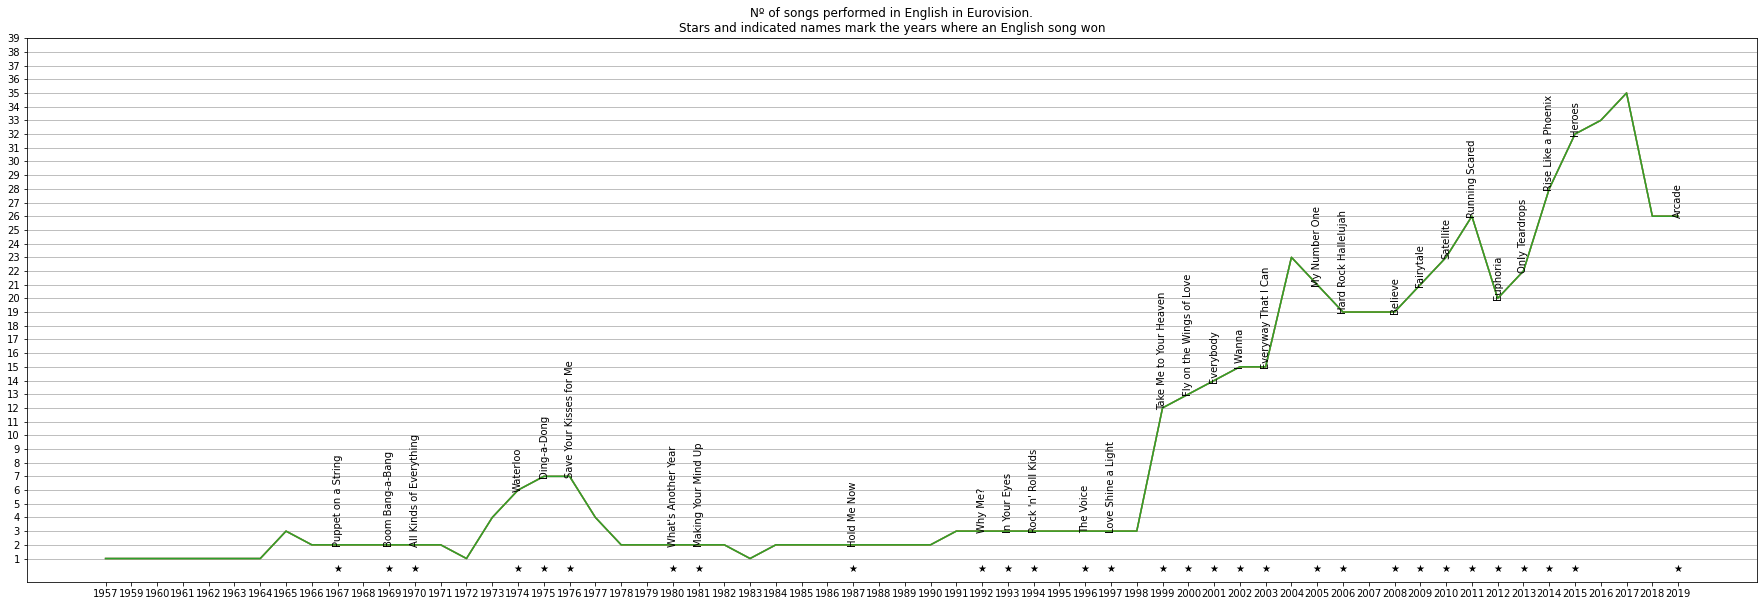

In [14]:
plt.figure(figsize=(31,10))
plt.plot(df.groupby('Year').count())
plt.yticks(np.arange(1,40,1))
axes = plt.gca()
axes.yaxis.grid()

plt.title("Nº of songs performed in English in Eurovision.\nStars and indicated names mark the years where an English song won")


for index, row in winners.iterrows():
    d = df[df['Year'] == row['Year']]['Year'].count()
    plt.annotate("★",xy=(row['Year'],0),xycoords='data',textcoords='data',ha='center')
    plt.annotate(row['Song'],xy=(row['Year'],d),xycoords='data',textcoords='data',ha='center',rotation=90)
#plt.savefig("eurovision.png")
plt.show()


# Nueva sección

<Figure size 432x288 with 0 Axes>